In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, Avogadro

In [85]:
## Write a 1D-molecular dynamics code involving LJ interactions

1. Initialize
2. calculate force and acceleration
3. advance position and velocity
4. calculate energy

In [86]:
### Argon:
epsilon = 0.0104 # in eV
sigma = 3.40 # in Å
mass = (39.95/Avogadro)*1e-3 # in kg

In [87]:
## 1D problem (3-particles)
## position in Å
pos = np.array([1,5,10])

## time-step (in pico-secs)
dt = 0.01

## number of steps
steps = 1000

## Temp in K
temp = 50

## Boltzmann Constant in J/K

In [88]:
## ideal gas 1/2mv^2 = 1/2kBT

def init_vel(pos, temp):
    """in Å/pico-sec"""
    randnum = np.random.rand(pos.size)-0.5
    vel_x = randnum*np.sqrt((((Boltzmann*temp)/mass)*1e-4))
    return vel_x

In [89]:
## force

def LJ_force(r, epsilon, sigma):
    """units eV/Å"""
    return 48*epsilon*(np.power(sigma,12)/np.power(r,13)) - 24*epsilon*(np.power(sigma,6)/np.power(r,7))

In [91]:
## acceleration

def get_acc(pos, epsilon, sigma, mass):
    """in units Å/picosec^2"""
    acc_x = np.zeros((pos.size, pos.size))
    for i in range(pos.size-1):
        for j in range(i+1, pos.size):
            r_ij = pos[j]-pos[i]
            r = np.sqrt(r_ij*r_ij)
            force_scalar = LJ_force(r, epsilon, sigma)
            force = force_scalar*(r_ij/r)
            acc_x[i,j] = (force/mass)*1.602e-23
            acc_x[j,i] = -acc_x[i,j]
    return np.sum(acc_x,axis=0)

In [93]:
## MD intergration using Velocity Verlet

pos_steps = np.zeros((steps, pos.size))
vel_steps = np.zeros((steps, pos.size))

vel_half = np.zeros((pos.size))
newpos = np.zeros((pos.size))
newvel = np.zeros((pos.size))
newacc = np.zeros((pos.size))

vel = init_vel(pos, temp)
acc = get_acc(pos, epsilon, sigma, mass)

for i in range(steps):
    vel_half = vel + 0.5*acc*dt
    newpos = pos + vel_half*dt
    newacc = get_acc(newpos, epsilon, sigma, mass)
    newvel = vel_half + 0.5*newacc*dt
    pos_steps[i,:]=newpos
    vel_steps[i,:]=newvel
    vel = newvel
    pos = newpos
    acc = newacc

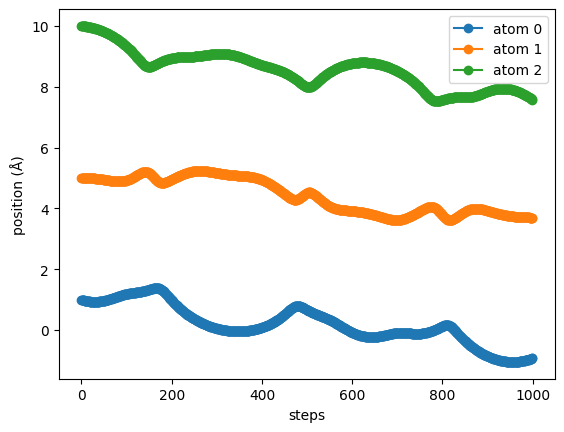

In [94]:
for i in range(pos_steps.shape[1]):
    plt.plot(pos_steps[:,i], marker='o', label='atom {}'.format(i))
    
plt.xlabel('steps')
plt.ylabel('position (Å)')
plt.legend()
plt.show()